In [1]:
import sys
import os
import cv2
import tensorflow.keras.backend as K
import numpy as np
from numpy import asarray
from core.networks_simple import UNET
from PIL import Image as im
K.set_image_data_format('channels_first')
os.environ['KERAS_BACKEND'] = "tensorflow"


In [3]:



# print(len(res))
vid_arr = np.zeros(shape=(2, 832, 928, 3), dtype="uint8")
image1 = im.open('./dynamic/balloon_img/000350.png')
image2 = im.open('./dynamic/balloon_img/000399.png')
vid_arr[0] = cv2.resize(asarray(image1), (928, 832))
vid_arr[1] = cv2.resize(asarray(image2), (928, 832))


In [2]:


model = UNET((6, 832, 928))
model.load_weights('./model_weights_for 512x256 5ep simple unet/model_weights.hdf5')


In [4]:


  
pred = model.predict(np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0))
res = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
img = im.fromarray(res)
img.save('./experiments/i50/out.png')


In [5]:


def recursive(frame1, frame2, num_recursions):
  if num_recursions == 0:
    yield frame1
  else:
    # Adds the batch dimension to all inputs before calling the interpolator,
    # and remove it afterwards.
    # time = np.full(shape=(1,), fill_value=0.5, dtype=np.float32)
    pred = model.predict(np.expand_dims(np.transpose(np.concatenate((frame1, frame2), axis=2)/255., (2,0,1)), axis=0))
    mid_frame = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
    yield from recursive(frame1, mid_frame, num_recursions - 1)
    yield from recursive(mid_frame, frame2, num_recursions - 1)


In [8]:


result = list(recursive(vid_arr[0], vid_arr[1], 6))
result.append(vid_arr[1])
len(result)
for i,img in enumerate(result):
  image = im.fromarray(img)
  image.save(f'./experiments/i50/{i}.png')


In [6]:

import math
from skimage.metrics import structural_similarity as compare_ssim
def calculateMetrics(gt, result):
  psnr_val = psnr(gt, result)
  ssim = calculate_ssim(gt, result)
  print(psnr_val,',',ssim)
  # print(f"SSIM: {ssim}%")

def psnr(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
    return 100
  # print(f"MSE: {mse}")
  PIXEL_MAX = 255.0
  psnr_val = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
  return psnr_val
  # print(f"PSNR: {psnr_val}")

def calculate_ssim(gt, result):
  grayGT = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
  grayRes = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
  (score, diff) = compare_ssim(grayGT, grayRes, full=True)
  diff = (diff * 255).astype("uint8")
  return score


In [20]:

for i in range (65):
  gt = cv2.imread('./experiments/i50/0.png')
  gt_res = cv2.resize(gt, (928, 832))
  pre = cv2.imread(f'./experiments/i50/{i}.png')
  calculateMetrics(pre, gt_res)

100 , 1.0
32.5780988567027 , 0.8409386327654298
32.59643570034107 , 0.8412373197818254
31.560534931996365 , 0.7659253372792311
32.54984000011189 , 0.8417581241321583
31.18589098624308 , 0.7432680229060902
31.461976769903572 , 0.766513597265516
31.104872661507336 , 0.7440945529285021
32.200635707092225 , 0.8416288252780004
30.92286132162849 , 0.7366092670939784
30.963208487505938 , 0.7433968340268481
30.57290998578398 , 0.7121180398601296
31.09419962019836 , 0.7656235652849404
30.492428980392564 , 0.7115816315799935
30.757695527643577 , 0.7424535850551718
30.615250848105624 , 0.735363996035793
31.46744257887208 , 0.8329021112791459
30.519860156559453 , 0.731776963576601
30.508082516930656 , 0.7326412926768753
30.1688858528344 , 0.6985969016479737
30.518613367708664 , 0.736513163473579
30.038258281435738 , 0.688974866120767
30.20489826095716 , 0.7046176002420544
30.074321811635944 , 0.694323891064002
30.608610798217242 , 0.7495471598531408
30.031194799033063 , 0.6918262993168478
30.10760

In [23]:

for i in range (65):
  gt = cv2.imread('./experiments/i50/64.png')
  gt_res = cv2.resize(gt, (928, 832))
  pre = cv2.imread(f'./experiments/i50/{i}.png')
  # print(64 ,i)
  calculateMetrics(pre, gt_res)

31.318017821661183 , 0.666414215712066
30.06379355511831 , 0.5735508790927173
30.080265721260062 , 0.5747028298814609
29.736293066860004 , 0.5280560421769702
30.120385750848996 , 0.5779958658663471
29.635470631565852 , 0.516285993829315
29.79991714714813 , 0.533026356778944
29.67449404284144 , 0.52024971790231
30.22339376225687 , 0.5882412732417334
29.655391036288165 , 0.5187797581985482
29.733887422606294 , 0.5256428286069623
29.54009262320088 , 0.5064143405287483
29.923081227272675 , 0.5484309116777876
29.573173004932457 , 0.5108516534572112
29.802508878626497 , 0.5377360893274716
29.75937738630465 , 0.535227124762453
30.444183444911598 , 0.6230868408220901
29.773547359015055 , 0.5379725680543804
29.81822295761774 , 0.5420782529316692
29.577010274661546 , 0.5163353485846528
29.91332863296805 , 0.5553802547037935
29.529050329208076 , 0.5150115362805515
29.706956215522837 , 0.5351006065906359
29.618384487193627 , 0.5293339085643379
30.135333084964252 , 0.5994967983535888
29.64496171651

In [26]:
import sys
import os
import cv2
import tensorflow.keras.backend as K
import numpy as np
from numpy import asarray
from core.networks_simple import UNET
from PIL import Image as im
K.set_image_data_format('channels_first')
os.environ['KERAS_BACKEND'] = "tensorflow"




# print(len(res))
vid_arr = np.zeros(shape=(2, 1056, 1056, 3), dtype="uint8")
image1 = im.open('./now/my_photo/my photo.jpg')
image2 = im.open('./now/my_photo/my photo.jpg')
vid_arr[0] = cv2.resize(asarray(image1), (1056, 1056))
vid_arr[1] = cv2.resize(asarray(image2), (1056, 1056))



model = UNET((6, 1056, 1056))
model.load_weights('./model_weights_for 512x256 5ep simple unet/model_weights.hdf5')



  
pred = model.predict(np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0))
res = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
img = im.fromarray(res)
img.save('./experiments/same/out.png')



In [30]:
gt = cv2.imread('./now/my_photo/my photo.jpg')
gt_res = cv2.resize(gt, (1056, 1056))
pre = cv2.imread('./experiments/same/out.png')
calculateMetrics(pre, gt_res)

35.520395982600434 , 0.9550016645116387


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  69  70  71  72  73
  74  75  76  78  80  81  82  83  84  85  86  87  88  89  90  93  94  96
  98 195 201 202 203 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255]
[414399 514506 440916 192031  86022  66385  53941  44287  37073  31340
  26751  22752  18920  16142  13916  11607   9928   8552   7018   5980
   4884   4101   3247   2611   2199   1683   1344   1076    861    667
    538    393    324    262    199    141    111     81     69     52
     46     33     24     27     26     17      9     17      5      8
     22      7      9      3      7      9      3  

Text(0.5, 1.0, 'Average')

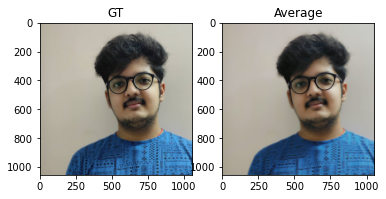

In [32]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
gt = cv2.imread('./now/my_photo/my photo.jpg')
gt_res = cv2.resize(gt, (1056, 1056))
gt = cv2.cvtColor(gt_res, cv2.COLOR_BGR2RGB)
image = cv2.imread(f"./experiments/same/out.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
import numpy as np
diff = np.absolute(np.array(gt) - np.array(image))
unique, counts = np.unique(diff, return_counts=True)
print(unique)
print(counts)
f, ax = plt.subplots(1,2)
ax[0].imshow(gt)
ax[0].set_title("GT")
ax[1].imshow(image)
ax[1].set_title("Average")

In [33]:
from PIL import Image
def adjuster(r1, r2, diff):
  mask1 = np.where((diff >= r1) & (diff < (r1 + 1)))
  mask2 = np.where((diff >= r2) & (diff < (r2 + 1)))
  print(mask1[0].size, mask2[0].size)
  image[mask1] += r1
  image[mask2] -= r1
  diff_array = np.absolute(np.array(gt) - np.array(image))
  unique, counts = np.unique(diff_array, return_counts=True)
  print(unique)
  print(counts)
  print(f"For Val: {r1} and {r2 - 256}")
  calculateMetrics(gt, image)
  modified_img = Image.fromarray(image, 'RGB')
  modified_img.save(f"./experiments/same/{r1}.png")
  # f, ax = plt.subplots(1,2)
  # ax[0].set_title("GT")
  # ax[0].imshow(gt)
  # ax[1].set_title(f"Modified by {r1} pix")
  # ax[1].imshow(modified_img)


In [1]:
for i in reversed(range(222, 256)):
  adjuster(256 - i, i, diff)

NameError: name 'adjuster' is not defined

In [ ]:
gt = cv2.imread('./now/my_photo/my photo.jpg')
gt_res = cv2.resize(gt, (1056, 1056))
pre = cv2.imread('./experiments/same/eash_nc.png')
calculateMetrics(pre, gt_res)

40.446642668100964 , 0.9877105099770264


In [1]:
import sys
import os
import cv2
import tensorflow.keras.backend as K
import numpy as np
from numpy import asarray
from core.networks_simple import UNET
from PIL import Image as im
K.set_image_data_format('channels_first')
os.environ['KERAS_BACKEND'] = "tensorflow"




# print(len(res))
vid_arr = np.zeros(shape=(2, 1600, 1600, 3), dtype="uint8")
image1 = im.open('./experiments/diff_photo/000.jpeg')
image2 = im.open('./experiments/diff_photo/051.jpeg')
vid_arr[0] = cv2.resize(asarray(image1), (1600, 1600))
vid_arr[1] = cv2.resize(asarray(image2), (1600, 1600))



model = UNET((6, 1600, 1600))
model.load_weights('./model_weights_for 512x256 5ep simple unet/model_weights.hdf5')



  
pred = model.predict(np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0))
res = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
img = im.fromarray(res)
img.save('./experiments/diff_photo/out.png')


In [2]:



def recursive(frame1, frame2, num_recursions):
  if num_recursions == 0:
    yield frame1
  else:
    # Adds the batch dimension to all inputs before calling the interpolator,
    # and remove it afterwards.
    # time = np.full(shape=(1,), fill_value=0.5, dtype=np.float32)
    pred = model.predict(np.expand_dims(np.transpose(np.concatenate((frame1, frame2), axis=2)/255., (2,0,1)), axis=0))
    mid_frame = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
    yield from recursive(frame1, mid_frame, num_recursions - 1)
    yield from recursive(mid_frame, frame2, num_recursions - 1)


In [3]:



result = list(recursive(vid_arr[0], vid_arr[1], 6))
result.append(vid_arr[1])
len(result)
for i,img in enumerate(result):
  image = im.fromarray(img)
  image.save(f'./experiments/diff_photo/rec/{i}.png')


In [8]:
import sys
import os
import cv2
import tensorflow.keras.backend as K
import numpy as np
from numpy import asarray
from core.networks_simple import UNET
from PIL import Image as im
K.set_image_data_format('channels_first')
os.environ['KERAS_BACKEND'] = "tensorflow"




# print(len(res))
vid_arr = np.zeros(shape=(2, 1056, 1056, 3), dtype="uint8")
image1 = im.open('./experiments/same-artificial/000.png')
image2 = im.open('./experiments/same-artificial/002.png')
vid_arr[0] = cv2.resize(asarray(image1), (1056, 1056))
vid_arr[1] = cv2.resize(asarray(image2), (1056, 1056))



model = UNET((6, 1056, 1056))
model.load_weights('./model_weights_for 512x256 5ep simple unet/model_weights.hdf5')



  
pred = model.predict(np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0))
res = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
img = im.fromarray(res)
img.save('./experiments/same-artificial/out.png')


In [9]:
gt = cv2.imread('./experiments/same-artificial/000.png')
gt_res = cv2.resize(gt, (1056, 1056))
pre = cv2.imread('./experiments/same-artificial/out.png')
calculateMetrics(pre, gt_res)

31.959964431255045 , 0.19221051576777248
